# 使用nmc_met_io检索Micaps数据


In [1]:
import numpy as np
import pandas as pd
import xarray as xr

xr.set_options(display_style="html")

## 获取数据信息

获取指定目录下的所有文件名

In [2]:
from nmc_met_io.retrieve_micaps_server import get_file_list
file_list = get_file_list(
    "ECMWF_HR/HGT/500",
)
pd.Series(file_list).describe()

count             2332
unique            2332
top       20022908.162
freq                 1
dtype: object

获取最新的10个文件名

In [3]:
file_list = get_file_list(
    "ECMWF_HR/HGT/500",
    latest=10,
)
file_list

['20031508.240',
 '20031508.234',
 '20031508.228',
 '20031508.222',
 '20031508.216',
 '20031508.210',
 '20031508.204',
 '20031508.198',
 '20031508.192',
 '20031508.186']

返回最新的起报时间，格式为YYMMDDHH

In [4]:
from nmc_met_io.retrieve_micaps_server import get_latest_initTime
get_latest_initTime("ECMWF_HR/RH/850")

'20031508'

## 获取模式数据

读取单个时次模式标量预报数据。

In [5]:
from nmc_met_io.retrieve_micaps_server import get_model_grid
directory = "ECMWF_HR/TMP/850"
file_name = "20031108.024"
data = get_model_grid(
    directory, 
    filename=file_name, 
    cache=False
)
data.data
    

<xarray.DataArray 'data' (time: 1, level: 1, lat: 281, lon: 361)>
array([[[[ -2.6221583,  -2.3409083,  -1.9659082, ..., -12.387783 ,
          -13.622158 , -14.684658 ],
         [ -1.2940332,  -1.3096582,  -1.0909082, ..., -11.856533 ,
          -12.106533 , -12.856533 ],
         [ -0.1065332,  -0.3409082,  -0.2471582, ..., -14.372158 ,
          -14.122158 , -13.981533 ],
         ...,
         [ 18.424717 ,  18.409092 ,  18.502842 , ...,  19.159092 ,
           19.252842 ,  19.159092 ],
         [ 18.471592 ,  18.393467 ,  18.565342 , ...,  19.377842 ,
           19.330967 ,  19.362217 ],
         [ 18.502842 ,  18.455967 ,  18.502842 , ...,  20.112217 ,
           19.815342 ,  19.830967 ]]]], dtype=float32)
Coordinates:
  * time                     (time) datetime64[ns] 2020-03-12T08:00:00
  * level                    (level) float32 850.0
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2020-03-11T08:00:00
    forecast_period          (time) float64 24.0
Attributes:
    units:

可以设置数据的变量名, 变量属性等属性。

In [6]:
directory = "ECMWF_HR/TMP/850"
file_name = "20031108.024"
data = get_model_grid(
    directory, 
    filename=file_name, 
    varname="TEM", 
    varattrs={
        "long_name": "temperature",
        "units": "degree",
    }, 
    cache=False
)
data.TEM

<xarray.DataArray 'TEM' (time: 1, level: 1, lat: 281, lon: 361)>
array([[[[ -2.6221583,  -2.3409083,  -1.9659082, ..., -12.387783 ,
          -13.622158 , -14.684658 ],
         [ -1.2940332,  -1.3096582,  -1.0909082, ..., -11.856533 ,
          -12.106533 , -12.856533 ],
         [ -0.1065332,  -0.3409082,  -0.2471582, ..., -14.372158 ,
          -14.122158 , -13.981533 ],
         ...,
         [ 18.424717 ,  18.409092 ,  18.502842 , ...,  19.159092 ,
           19.252842 ,  19.159092 ],
         [ 18.471592 ,  18.393467 ,  18.565342 , ...,  19.377842 ,
           19.330967 ,  19.362217 ],
         [ 18.502842 ,  18.455967 ,  18.502842 , ...,  20.112217 ,
           19.815342 ,  19.830967 ]]]], dtype=float32)
Coordinates:
  * time                     (time) datetime64[ns] 2020-03-12T08:00:00
  * level                    (level) float32 850.0
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2020-03-11T08:00:00
    forecast_period          (time) float64 24.0
Attributes:
    long_name:  temperature
    units:      degree

批量获取多个数据

In [7]:
from nmc_met_io.retrieve_micaps_server import get_model_grids
dataset = get_model_grids(
    directory, 
    filenames=[f"20031108.{i:03}" for i in range(0, 25, 3)], 
    pbar=True,
    cache=False
)
dataset["data"]

ECMWF_HR/TMP/850: 100%|██████████| 9/9 [00:00<00:00, 20.88it/s]


<xarray.DataArray 'data' (time: 9, level: 1, lat: 281, lon: 361)>
array([[[[ -3.9067652 ,  -3.6567652 ,  -3.4067652 , ..., -18.703655  ,
          -18.578655  , -18.516155  ],
         [ -2.1723902 ,  -1.7817651 ,  -1.3442651 , ..., -18.46928   ,
          -18.34428   , -18.25053   ],
         [ -0.60989016,  -0.26614013,   0.09323487, ..., -18.266155  ,
          -18.266155  , -18.203655  ],
         ...,
         [ 18.42136   ,  18.29636   ,  18.14011   , ...,  19.20261   ,
           19.35886   ,  19.499485  ],
         [ 18.39011   ,  18.343235  ,  18.20261   , ...,  19.35886   ,
           19.35886   ,  19.48386   ],
         [ 18.26511   ,  18.29636   ,  18.280735  , ...,  19.95261   ,
           19.48386   ,  19.468235  ]]],


       [[[ -4.6415977 ,  -4.5165977 ,  -4.3915977 , ..., -18.469723  ,
          -18.360348  , -18.235348  ],
         [ -4.4228477 ,  -4.2978477 ,  -4.0947227 , ..., -18.219723  ,
          -18.063473  , -17.954098  ],
         [ -3.922848  ,  -3.907223  ,  -3.688473  , ..., -18.063473  ,
          -18.000973  , -17.907223  ],
         ...,
         [ 18.874027  ,  18.889652  ,  18.733402  , ...,  19.077152  ,
           19.280277  ,  19.561527  ],
         [ 18.905277  ,  18.983402  ,  18.827152  , ...,  19.311527  ,
           19.405277  ,  19.499027  ],
         [ 18.920902  ,  19.061527  ,  18.983402  , ...,  19.952152  ,
           19.499027  ,  19.202152  ]]],


       [[[ -2.0389063 ,  -2.7576563 ,  -3.3045313 , ..., -18.023296  ,
          -17.898296  , -17.695171  ],
         [ -2.0232813 ,  -2.8514063 ,  -3.4607813 , ..., -17.851421  ,
          -17.679546  , -17.507671  ],
         [ -2.1326563 ,  -3.2576563 ,  -3.8514063 , ..., -17.617046  ,
          -17.554546  , -17.476421  ],
         ...,
         [ 19.414219  ,  19.507969  ,  19.570469  , ...,  18.570469  ,
           18.820469  ,  18.789219  ],
         [ 19.320469  ,  19.429844  ,  19.507969  , ...,  18.711094  ,
           18.632969  ,  18.601719  ],
         [ 19.242344  ,  19.289219  ,  19.336094  , ...,  18.882969  ,
           18.789219  ,  18.773594  ]]],


       ...,


       [[[  3.0279882 ,   2.9029882 ,   2.9342382 , ..., -13.815762  ,
          -14.628262  , -15.409512  ],
         [  4.1217384 ,   3.8092382 ,   3.6842382 , ..., -13.722012  ,
          -14.128262  , -14.972012  ],
         [  4.9967384 ,   4.7311134 ,   4.4811134 , ..., -15.925137  ,
          -16.081387  , -16.190762  ],
         ...,
         [ 17.981113  ,  18.074863  ,  18.277988  , ...,  19.340488  ,
           19.168613  ,  18.996738  ],
         [ 17.949863  ,  17.949863  ,  18.074863  , ...,  19.418613  ,
           19.184238  ,  18.996738  ],
         [ 18.090488  ,  17.996738  ,  17.856113  , ...,  19.465488  ,
           19.152988  ,  19.137363  ]]],


       [[[  3.2960546 ,   3.5304296 ,   3.7335546 , ..., -12.891445  ,
          -14.12582   , -15.485195  ],
         [  3.8429296 ,   4.12418   ,   4.31168   , ..., -12.735195  ,
          -13.18832   , -14.172695  ],
         [  3.9991796 ,   4.358555  ,   4.608555  , ..., -15.235195  ,
          -15.15707   , -15.141445  ],
         ...,
         [ 18.421055  ,  18.358555  ,  18.34293   , ...,  18.608555  ,
           18.733555  ,  18.56168   ],
         [ 18.62418   ,  18.452305  ,  18.358555  , ...,  18.37418   ,
           18.37418   ,  18.452305  ],
         [ 18.889805  ,  18.56168   ,  18.46793   , ...,  19.077305  ,
           18.46793   ,  18.671055  ]]],


       [[[ -2.6221583 ,  -2.3409083 ,  -1.9659082 , ..., -12.387783  ,
          -13.622158  , -14.684658  ],
         [ -1.2940332 ,  -1.3096582 ,  -1.0909082 , ..., -11.856533  ,
          -12.106533  , -12.856533  ],
         [ -0.1065332 ,  -0.3409082 ,  -0.2471582 , ..., -14.372158  ,
          -14.122158  , -13.981533  ],
         ...,
         [ 18.424717  ,  18.409092  ,  18.502842  , ...,  19.159092  ,
           19.252842  ,  19.159092  ],
         [ 18.471592  ,  18.393467  ,  18.565342  , ...,  19.377842  ,
     

获取时间序列数据

In [8]:
from nmc_met_io.retrieve_micaps_server import get_model_points
directory = "NWFD_SCMOC/TMP/2M_ABOVE_GROUND"
forecast_hours = np.arange(3, 75, 3)
filenames = [f"20031408.{hour:03}" for hour in forecast_hours]
points = {
    'lon':[116.3833, 110.0], 
    'lat':[39.9, 32],
}
data = get_model_points(directory, filenames, points)
points = data["data"]
points

<xarray.DataArray 'data' (time: 24, level: 1, points: 2)>
array([[[13.69967175, 11.26998594]],

       [[14.62996202, 15.23000765]],

       [[15.12631122, 16.63997965]],

       [[11.43631271, 10.1399771 ]],

       [[ 8.04640026,  4.27998505]],

       [[ 6.26624725,  3.3999855 ]],

       [[ 4.93257821,  2.60998089]],

       [[ 6.5230763 ,  4.69997664]],

       [[13.8299143 , 13.82000623]],

       [[15.23339242, 19.70998893]],

       [[15.47323917, 19.92998769]],

       [[11.50967601, 13.65999475]],

       [[ 7.2464106 ,  7.83998504]],

       [[ 4.72661674,  6.18998897]],

       [[ 1.97330037,  5.49999387]],

       [[ 2.64697281,  8.04000368]],

       [[ 4.77351423, 12.01000686]],

       [[12.09575915, 14.71999614]],

       [[12.59013931, 15.23998473]],

       [[ 8.69924855, 11.99999397]],

       [[ 6.19290629,  9.0599925 ]],

       [[ 5.52294008,  7.23998621]],

       [[ 4.668902  ,  6.77999308]],

       [[ 7.32416252,  7.4800055 ]]])
Coordinates:
    forecast_reference_time  datetime64[ns] 2020-03-14T08:00:00
  * level                    (level) float32 2.0
  * time                     (time) datetime64[ns] 2020-03-14T11:00:00 ... 2020-03-17T08:00:00
    forecast_period          (time) float64 3.0 6.0 9.0 12.0 ... 66.0 69.0 72.0
    lon                      (points) float64 116.4 110.0
    lat                      (points) float64 39.9 32.0
Dimensions without coordinates: points
Attributes:
    units:

选择第二个点的温度数据

In [9]:
points.sel(points=0)

<xarray.DataArray 'data' (time: 24, level: 1)>
array([[13.69967175],
       [14.62996202],
       [15.12631122],
       [11.43631271],
       [ 8.04640026],
       [ 6.26624725],
       [ 4.93257821],
       [ 6.5230763 ],
       [13.8299143 ],
       [15.23339242],
       [15.47323917],
       [11.50967601],
       [ 7.2464106 ],
       [ 4.72661674],
       [ 1.97330037],
       [ 2.64697281],
       [ 4.77351423],
       [12.09575915],
       [12.59013931],
       [ 8.69924855],
       [ 6.19290629],
       [ 5.52294008],
       [ 4.668902  ],
       [ 7.32416252]])
Coordinates:
    forecast_reference_time  datetime64[ns] 2020-03-14T08:00:00
  * level                    (level) float32 2.0
  * time                     (time) datetime64[ns] 2020-03-14T11:00:00 ... 2020-03-17T08:00:00
    forecast_period          (time) float64 3.0 6.0 9.0 12.0 ... 66.0 69.0 72.0
    lon                      float64 116.4
    lat                      float64 39.9
Attributes:
    units:

转换为`pandas.Series`对象并绘制条形图。

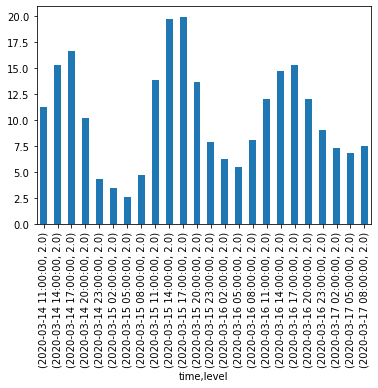

In [10]:
points.sel(points=1).to_series().plot.bar()

获取多个层次的数据（三维数据）。

`get_model_3D_grid`支持`get_model_grid`的所有参数。

In [11]:
from nmc_met_io.retrieve_micaps_server import get_model_3D_grid
data = get_model_3D_grid(
    directory="ECMWF_HR/TMP", 
    filename="20031408.024", 
    levels=[1000, 950, 925, 900, 850, 800, 700, 600, 500, 400, 300, 250, 200, 100],
    varname="TEM",
    cache=False,
)
data.TEM

<xarray.DataArray 'TEM' (time: 1, level: 14, lat: 281, lon: 361)>
array([[[[  1.1954077,   1.1641577,   1.1016577, ..., -12.757717 ,
          -13.632717 , -15.132717 ],
         [  1.4141577,   1.3516577,   1.1485327, ..., -12.351467 ,
          -13.195217 , -14.288967 ],
         [  1.1172827,   0.9454077,   0.6485327, ..., -11.148342 ,
          -11.476467 , -11.913967 ],
         ...,
         [ 26.992283 ,  27.070408 ,  27.179783 , ...,  26.695408 ,
           26.523533 ,  26.789158 ],
         [ 27.242283 ,  27.211033 ,  27.367283 , ...,  27.742283 ,
           27.070408 ,  26.742283 ],
         [ 27.164158 ,  27.039158 ,  27.242283 , ...,  28.257908 ,
           27.664158 ,  26.851658 ]],

        [[ -1.3813134,  -1.1781884,  -0.9281885, ..., -15.225063 ,
          -16.006313 , -17.225063 ],
         [ -1.2250634,  -1.0063134,  -0.7250635, ..., -14.803188 ,
          -15.240688 , -15.803188 ],
         [ -1.2719384,  -0.9750635,  -0.6625635, ..., -14.584438 ,
          -14.584438 , -14.553188 ],
         ...,
         [ 23.306187 ,  23.431187 ,  23.649937 , ...,  23.618687 ,
           23.415562 ,  23.306187 ],
         [ 23.446812 ,  23.524937 ,  23.665562 , ...,  24.806187 ,
           23.946812 ,  23.681187 ],
         [ 23.384312 ,  23.431187 ,  23.540562 , ...,  25.243687 ,
           24.853062 ,  24.384312 ]],

        [[ -3.0349696,  -2.6599696,  -2.3787196, ..., -16.144344 ,
          -16.675594 , -17.56622  ],
         [ -2.9724696,  -2.6912196,  -2.4880946, ..., -15.988094 ,
          -16.12872  , -16.331844 ],
         [ -2.7849696,  -2.4412196,  -2.2068446, ..., -16.12872  ,
          -16.06622  , -15.863094 ],
         ...,
         [ 22.293156 ,  22.43378  ,  22.49628  , ...,  22.93378  ,
           22.980656 ,  22.71503  ],
         [ 22.418156 ,  22.46503  ,  22.511906 , ...,  23.574406 ,
           23.105656 ,  22.77753  ],
         [ 22.355656 ,  22.324406 ,  22.40253  , ...,  23.62128  ,
           23.62128  ,  22.918156 ]],

        ...,

        [[-48.95225  , -49.124126 , -49.20225  , ..., -56.741314 ,
          -56.69444  , -56.655376 ],
         [-49.085064 , -49.19444  , -49.19444  , ..., -56.47569  ,
          -56.553814 , -56.63975  ],
         [-49.20225  , -49.272564 , -49.28819  , ..., -56.553814 ,
          -56.72569  , -56.897564 ],
         ...,
         [-39.530376 , -39.45225  , -39.35069  , ..., -38.8585   ,
          -38.780376 , -38.749126 ],
         [-39.60069  , -39.491314 , -39.296    , ..., -38.796    ,
          -38.780376 , -38.76475  ],
         [-39.717876 , -39.522564 , -39.249126 , ..., -38.741314 ,
          -38.63975  , -38.530376 ]],

        [[-47.0825   , -47.23875  , -47.23875  , ..., -57.715313 ,
          -57.691875 , -57.660625 ],
         [-47.371563 , -47.410625 , -47.36375  , ..., -57.840313 ,
          -57.77     , -57.684063 ],
         [-47.395    , -47.379375 , -47.355938 , ..., -57.67625  ,
          -57.543438 , -57.449688 ],
         ...,
         [-52.371563 , -52.480938 , -52.355938 , ..., -50.902813 ,
          -50.92625  , -50.848125 ],
         [-52.449688 , -52.5825   , -52.42625  , ..., -50.895    ,
          -50.980938 , -50.910625 ],
         [-52.434063 , -52.559063 , -52.42625  , ..., -50.879375 ,
          -50.996563 , -50.934063 ]],

        [[-48.450893 , -48.419643 , -48.56027  , ..., -58.90402  ,
          -58.982143 , -58.96652  ],
         [-48.93527  , -48.93527  , -49.075893 , ..., -58.482143 ,
          -58.43527  , -58.31027  ],
         [-49.24777  , -49.200893 , -49.18527  , ..., -58.02902  ,
          -57.87277  , -57.71652  ],
         ...,
         [-81.56027  , -81.5134   , -81.5134   , ..., -80.54465  ,
          -80.7634   , -80.10715  ],
         [-81.35715  , -81.29465  , -81.34152  , ..., -80.29465  ,
          -80.16965  , -80.02902  ],
         [-81.23215  , -81.2634   , -81.3884   , ..., -79.91965  ,
          -79.56027  , -79.8884   ]]]], dtype=float32)
Coordinates:
    forecast_period          (time) float64 24.0
  

批量获取三维数据，包括多个层次和多个起报时间/预报时效。

In [12]:
from nmc_met_io.retrieve_micaps_server import get_model_3D_grids
dataset = get_model_3D_grids(
    directory="ECMWF_HR/TMP",
    filenames=[f"20031108.{i:03}" for i in range(0, 25, 3)], 
    levels=[1000, 950, 925, 900, 850, 800, 700, 600, 500, 400, 300, 250, 200, 100],
    pbar=True,
    cache=False,
)
dataset

ECMWF_HR/TMP: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


<xarray.Dataset>
Dimensions:                  (lat: 281, level: 14, lon: 361, time: 9)
Coordinates:
    forecast_reference_time  datetime64[ns] 2020-03-11T08:00:00
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
  * level                    (level) float64 1e+03 950.0 925.0 ... 200.0 100.0
    forecast_period          (time) float64 0.0 3.0 6.0 9.0 ... 18.0 21.0 24.0
  * time                     (time) datetime64[ns] 2020-03-11T08:00:00 ... 2020-03-12T08:00:00
Data variables:
    data                     (time, level, lat, lon) float32 -0.021328125 ... -81.6812
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

获取时间序列垂直廓线数据。

In [13]:
from nmc_met_io.retrieve_micaps_server import get_model_profiles
directory = "GRAPES_GFS/RH"
levels = [1000, 950, 925, 900, 850, 800, 700, 600, 500, 400, 300, 250, 200, 100]
filenames = ["20031420.024"]
points = {
    "lon": [116.3833, 110.0], 
    "lat": [39.9, 32]
}
data = get_model_profiles(
    directory=directory, 
    filenames=filenames, 
    levels=levels, 
    points=points
)
data.data

GRAPES_GFS/RH: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]


<xarray.DataArray 'data' (time: 1, level: 14, points: 2)>
array([[[32.94308777, 40.20000076],
        [38.07592596, 44.70000076],
        [43.53846615, 47.27499962],
        [47.97770995, 48.82999992],
        [55.06983004, 39.29500008],
        [59.47072263, 52.41500092],
        [51.21234046, 44.84500122],
        [12.97380294, 99.63025284],
        [15.25935357, 81.5       ],
        [15.67390706, 11.99017859],
        [22.92459437, 33.87999916],
        [22.05680103, 40.50500107],
        [13.22674707, 53.40000153],
        [ 1.15047079,  3.52499998]]])
Coordinates:
    forecast_reference_time  datetime64[ns] 2020-03-14T20:00:00
  * level                    (level) float64 1e+03 950.0 925.0 ... 200.0 100.0
    forecast_period          (time) float64 24.0
  * time                     (time) datetime64[ns] 2020-03-15T20:00:00
    lon                      (points) float64 116.4 110.0
    lat                      (points) float64 39.9 32.0
Dimensions without coordinates: points
Attributes:
    units:

In [14]:
time_series = data.data.sel(points=1, time="2020-03-15T20:00:00")
time_series

<xarray.DataArray 'data' (level: 14)>
array([40.20000076, 44.70000076, 47.27499962, 48.82999992, 39.29500008,
       52.41500092, 44.84500122, 99.63025284, 81.5       , 11.99017859,
       33.87999916, 40.50500107, 53.40000153,  3.52499998])
Coordinates:
    forecast_reference_time  datetime64[ns] 2020-03-14T20:00:00
  * level                    (level) float64 1e+03 950.0 925.0 ... 200.0 100.0
    forecast_period          float64 24.0
    time                     datetime64[ns] 2020-03-15T20:00:00
    lon                      float64 110.0
    lat                      float64 32.0
Attributes:
    units:

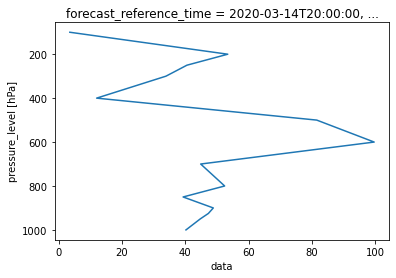

In [15]:
time_series.plot.line(y="level", yincrease=False)

## 站点数据

获取站点观测数据，默认获取最新的数据。返回值是`pandas.DataFrame`类型。

In [16]:
from nmc_met_io.retrieve_micaps_server import get_station_data
data = get_station_data(
    "SURFACE/PLOT_10MIN",
    cache=False,
)
data

,ID,lon,lat,Alt,Relative_humidity,806,Wind_angle_2m_avg,210,Wind_speed_2m_avg,212,...,602,Pressure,414,Dewpoint,802,Vis_1min,1202,Rain,1002,time
0,786444,107.009697,23.463900,350.000000,84.0,False,168.0,False,0.1,False,...,False,1000.900024,False,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
1,720906,126.753098,45.772800,132.000000,70.0,False,287.0,False,1.1,False,...,False,1006.599976,False,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
2,720905,126.542198,45.735600,120.000000,77.0,False,198.0,False,0.7,False,...,False,1007.299988,False,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
3,720911,126.571098,46.762798,123.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
4,720903,126.631699,45.745800,121.000000,NaN,NaN,128.0,False,0.8,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46536,720891,127.913597,46.008900,140.500000,NaN,NaN,253.0,False,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
46537,786424,107.125298,23.325001,285.000000,82.0,False,70.0,False,1.4,False,...,False,981.700012,False,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
46538,720894,127.801903,46.240299,140.000000,80.0,False,10.0,False,1.6,False,...,False,1003.500000,False,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00
46539,720895,127.813599,46.318600,136.300003,NaN,NaN,194.0,False,2.5,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 21:50:00


指定文件名可以访问历史数据

In [17]:
data = get_station_data(
    "SURFACE/TMP_MAX_24H_NATIONAL", 
    filename="20200315080000.000",
    cache=False,
)
data

,ID,lon,lat,Temp_24h_max,610,Alt,Grade,time
0,57345,109.616699,31.400000,23.500000,False,337.799988,13,2020-03-15 08:00:00
1,57348,109.483299,31.033300,23.600000,False,299.799988,12,2020-03-15 08:00:00
2,57349,109.866699,31.083300,20.000000,False,606.799988,13,2020-03-15 08:00:00
3,57355,110.349998,31.048300,22.500000,False,337.500000,12,2020-03-15 08:00:00
4,57358,110.966698,30.833300,21.700001,False,295.500000,11,2020-03-15 08:00:00
...,...,...,...,...,...,...,...,...
2421,57329,107.849998,31.100000,20.100000,False,467.500000,13,2020-03-15 08:00:00
2422,57333,108.666702,31.950001,20.600000,False,798.200012,13,2020-03-15 08:00:00
2423,57338,108.416702,31.183300,23.400000,False,216.500000,13,2020-03-15 08:00:00
2424,57339,108.683296,30.950001,22.900000,False,297.200012,13,2020-03-15 08:00:00


批量获取站点观测数据。

In [19]:
from nmc_met_io.retrieve_micaps_server import get_station_dataset
data_set = get_station_dataset(
    "SURFACE/TMP_MAX_24H_NATIONAL", 
    filenames=[f"20200314{hour:02}0000.000" for hour in range(0, 23)],
    pbar=True,
    cache=False,
)
data_set

SURFACE/TMP_MAX_24H_NATIONAL:   0%|          | 0/23 [00:01<?, ?it/s]


,ID,lon,lat,Temp_24h_max,610,Alt,Grade,time
0,57345,109.616699,31.400000,16.100000,False,337.799988,13,2020-03-14 00:00:00
1,57348,109.483299,31.033300,16.700001,False,299.799988,12,2020-03-14 00:00:00
2,57349,109.866699,31.083300,15.600000,False,606.799988,13,2020-03-14 00:00:00
3,57355,110.349998,31.048300,17.799999,False,337.500000,12,2020-03-14 00:00:00
4,57358,110.966698,30.833300,15.500000,False,295.500000,11,2020-03-14 00:00:00
...,...,...,...,...,...,...,...,...
2421,57329,107.849998,31.100000,20.100000,False,467.500000,13,2020-03-14 22:00:00
2422,57333,108.666702,31.950001,20.600000,False,798.200012,13,2020-03-14 22:00:00
2423,57338,108.416702,31.183300,23.400000,False,216.500000,13,2020-03-14 22:00:00
2424,57339,108.683296,30.950001,22.900000,False,297.200012,13,2020-03-14 22:00:00


## 雷达数据

获取雷达回波全国拼图数据。

注意：API可以调用，但返回的数据暂时为NaN，可能是我没有设置好服务器。

In [18]:
from nmc_met_io.retrieve_micaps_server import get_radar_mosaic
data = get_radar_mosaic(
    "RADARMOSAIC/CREF",
    filename="ACHN.CREF000.20200314.080000.LATLON",
)
data.data

<xarray.DataArray 'data' (time: 1, lat: 4200, lon: 6200)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-15
  * lat      (lat) float64 12.21 12.22 12.23 12.24 ... 54.17 54.18 54.19 54.2
  * lon      (lon) float64 73.0 73.0 73.01 73.02 ... 135.0 135.0 135.0 135.0
Attributes:
    long_name:   Composite Reflectivity
    short_name:  CREF
    units:       dBZ

## TLOGP 图

获取TLOGP数据信息，返回`pandas.DataFrame`。

In [20]:
from nmc_met_io.retrieve_micaps_server import get_tlogp
data = get_tlogp("UPPER_AIR/TLOGP", cache=False)
data

,ID,lon,lat,alt,time,p,h,t,td,wind_angle,wind_speed
0,48900,106.67,10.82,5.0,2020-03-15 20:00:00,1010.0,9999.0,29.00,21.00,140.0,3.0
1,48900,106.67,10.82,5.0,2020-03-15 20:00:00,1010.0,9999.0,9999.00,9999.00,140.0,1.5
2,48900,106.67,10.82,5.0,2020-03-15 20:00:00,1010.0,9999.0,29.00,21.00,9999.0,9999.0
3,48900,106.67,10.82,5.0,2020-03-15 20:00:00,1010.0,9999.0,29.00,21.00,140.0,3.0
4,48900,106.67,10.82,5.0,2020-03-15 20:00:00,1010.0,9999.0,29.00,21.00,140.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
55584,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.6,2790.6,-63.89,-91.96,314.0,36.8
55585,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.5,9999.0,-64.10,-93.10,9999.0,9999.0
55586,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.4,2800.6,-64.23,-85.86,317.0,37.6
55587,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.4,2800.6,-64.23,-85.86,317.0,37.6


In [43]:
data = get_tlogp(
    directory="UPPER_AIR/TLOGP",
    filename="20200315080000.000",
    cache=False,
)
data

,ID,lon,lat,alt,time,p,h,t,td,wind_angle,wind_speed
0,43333,92.7200,11.6700,78.0,2020-03-15 08:00:00,1001.0,9999.0,24.60,23.40,0.0,0.0
1,43333,92.7200,11.6700,78.0,2020-03-15 08:00:00,1001.0,9999.0,24.60,23.40,9999.0,9999.0
2,43333,92.7200,11.6700,78.0,2020-03-15 08:00:00,1001.0,9999.0,9999.00,9999.00,0.0,0.0
3,43333,92.7200,11.6700,78.0,2020-03-15 08:00:00,1000.0,9999.0,9999.00,9999.00,55.0,1.0
4,43333,92.7200,11.6700,78.0,2020-03-15 08:00:00,1000.0,8.8,25.60,22.70,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
60107,71109,-127.3758,50.6851,17.0,2020-03-15 08:00:00,9.1,3071.6,-61.45,-81.31,308.0,33.6
60108,71109,-127.3758,50.6851,17.0,2020-03-15 08:00:00,9.1,9999.0,-61.30,-82.30,9999.0,9999.0
60109,71109,-127.3758,50.6851,17.0,2020-03-15 08:00:00,9.1,3076.4,-61.16,-82.09,306.0,34.7
60110,71109,-127.3758,50.6851,17.0,2020-03-15 08:00:00,9.1,3076.4,-61.16,-82.09,306.0,34.7


批量获取TLOGP数据。

In [23]:
from nmc_met_io.retrieve_micaps_server import get_tlogps
data = get_tlogps(
    directory="UPPER_AIR/TLOGP",
    filenames=[f"20200315{hour:02}0000.000" for hour in (8, 20)],
    cache=False,
)
data

,ID,lon,lat,alt,time,p,h,t,td,wind_angle,wind_speed
0,43333,92.72,11.67,78.0,2020-03-15 08:00:00,1001.0,9999.0,24.60,23.40,0.0,0.0
1,43333,92.72,11.67,78.0,2020-03-15 08:00:00,1001.0,9999.0,24.60,23.40,9999.0,9999.0
2,43333,92.72,11.67,78.0,2020-03-15 08:00:00,1001.0,9999.0,9999.00,9999.00,0.0,0.0
3,43333,92.72,11.67,78.0,2020-03-15 08:00:00,1000.0,9999.0,9999.00,9999.00,55.0,1.0
4,43333,92.72,11.67,78.0,2020-03-15 08:00:00,1000.0,8.8,25.60,22.70,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56096,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.6,2790.6,-63.89,-91.96,314.0,36.8
56097,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.5,9999.0,-64.10,-93.10,9999.0,9999.0
56098,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.4,2800.6,-64.23,-85.86,317.0,37.6
56099,71109,-127.35,50.67,21.0,2020-03-15 20:00:00,14.4,2800.6,-64.23,-85.86,317.0,37.6
